# Отток клиентов

Из Банка стали уходить клиенты. Каждый месяц.Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Нам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

# Признаки
`RowNumber` — индекс строки в данных\
`CustomerId` — уникальный идентификатор клиента\
`Surname` — фамилия\
`CreditScore` — кредитный рейтинг\
`Geography` — страна проживания\
`Gender` — пол\
`Age` — возраст\
`Tenure` — количество недвижимости у клиента\
`Balance` — баланс на счёте\
`NumOfProducts` — количество продуктов банка, используемых клиентом\
`HasCrCard` — наличие кредитной карты\
`IsActiveMember` — активность клиента\
`EstimatedSalary` — предполагаемая зарплата
# Целевой признак
`Exited` — факт ухода клиента

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Подбор-моделей" data-toc-modified-id="Подбор-моделей-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подбор моделей</a></span><ul class="toc-item"><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайны-лес" data-toc-modified-id="Случайны-лес-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Случайны лес</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Тестирование модели</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Подготовка данных

In [1]:
#импорт библиотек и надстроек
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, precision_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.utils import shuffle
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import plotly.io as pio
pio.renderers.default = "svg"

In [2]:
#открытие файла
data = pd.read_csv('datasets/Churn.csv')

In [3]:
#иформация о df
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
#общий вид df на примере первых 5 строк
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [5]:
#посмотрим на значения NaN
data[(data['Tenure'] == data['Tenure'].isna()) & (data['Tenure'] == 0)]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
29,30,15656300,Lucciano,411,France,Male,29,0.0,59697.17,2,1,1,53483.21,0
35,36,15794171,Lombardo,475,France,Female,45,0.0,134264.04,1,1,0,27822.99,1
57,58,15647091,Endrizzi,725,Germany,Male,19,0.0,75888.20,1,0,0,45613.75,0
72,73,15812518,Palermo,657,Spain,Female,37,0.0,163607.18,1,0,1,44203.55,0
127,128,15782688,Piccio,625,Germany,Male,56,0.0,148507.24,1,1,0,46824.08,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9793,9794,15772363,Hilton,772,Germany,Female,42,0.0,101979.16,1,1,0,90928.48,0
9799,9800,15722731,Manna,653,France,Male,46,0.0,119556.10,1,1,0,78250.13,1
9843,9844,15778304,Fan,646,Germany,Male,24,0.0,92398.08,1,1,1,18897.29,0
9868,9869,15587640,Rowntree,718,France,Female,43,0.0,93143.39,1,1,0,167554.86,0


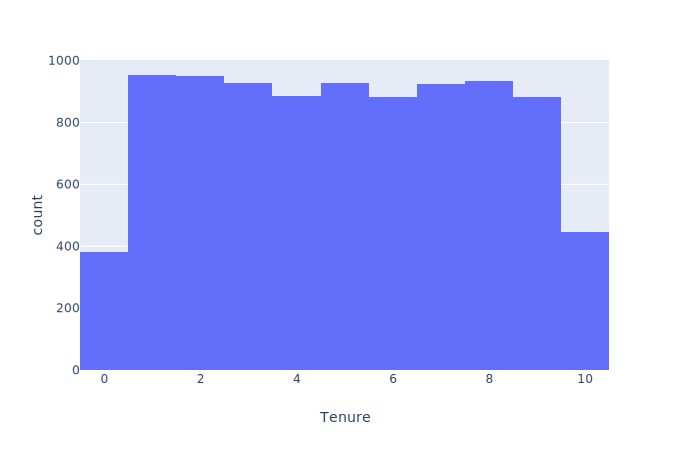

In [6]:
#проверим гистаграмму столбца Tenure
fig = px.histogram(data, x='Tenure')
fig.show()

`Вывод по пропускам:`

Гистограмма показывает, что клиенов без недвижимости 380, но все значения NaN это 0 и их 1291, как раз столько у нас пропущенных значений.

Возможно они появились из-за типа данных `float`.

Заменим все пропуски на 0 и изменим тип данных на `int`.

In [7]:
data = data.fillna(0)
data['Tenure']=data['Tenure'].astype('int64')

In [8]:
#проверяем
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
# удалим ненужные столбцы
data = data.drop(['Surname', 'RowNumber', 'CustomerId'], axis=1)

In [10]:
# Преобразуем категориальные признаки в численные с помощью One-Hot Encoding.
data_ohe = pd.get_dummies(data, columns=['Geography', 'Gender'], drop_first=True)
data_ohe.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [11]:
#разабьем данные на признаки и целевой признак
features = data_ohe.drop(['Exited'], axis=1) #признаки
target = data_ohe['Exited'] #целевой признак

In [12]:
# Разделим исходные данные на обучающую, валидационную и тестовую выборки 
features_df, features_valid, target_df, target_valid = train_test_split(
    features, target, test_size=0.20, random_state=12345, stratify = target)

features_train, features_test, target_train, target_test = train_test_split(
    features_df, target_df, test_size=0.25, random_state=12345, stratify = target_df)

In [13]:
#размеры выборок
print(features_train.shape)
print(target_train.shape)
print(features_test.shape)
print(target_test.shape)
print(features_valid.shape)
print(target_valid.shape)

(6000, 11)
(6000,)
(2000, 11)
(2000,)
(2000, 11)
(2000,)


**Исследуем** баланс целевых меток:

In [14]:
target_train.value_counts()

0    4777
1    1223
Name: Exited, dtype: int64

In [15]:
target_test.value_counts()

0    1593
1     407
Name: Exited, dtype: int64

In [16]:
target_valid.value_counts()

0    1593
1     407
Name: Exited, dtype: int64

`Вывод:`

Значенией 1 намного меньше чем 0 из-за этого мы не можем использовать accuracy в качестве метрики качества модели. Для проверки качетва используем AUC-ROC.

In [17]:
pd.options.mode.chained_assignment = None
# масштабирование вещественных значений
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

scaler = StandardScaler()
scaler.fit(features_train[numeric]) 

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

## Подбор моделей

### Дерево решений  

In [18]:
# подбор параметров для дерева решений
# если не укзаывать class_weight='balanced' будет деление на 0
def tree (features, target):
    best_result = 0
    best_depth = 0
    best_recall = 0
    best_precision = 0
    for depth in range(1, 25):
        model = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight='balanced')
        model.fit(features, target) 
        predictions = model.predict(features_valid)
        recall = recall_score(target_valid, predictions)
        precision = precision_score(target_valid, predictions)
        result = f1_score(target_valid, predictions)
        if result > best_result:
            best_result = result
            best_depth = depth
            best_recall = recall
            best_precision = precision
        
    print('F1 наилучшей модели :', best_result)
    print('Глубина дерева:', best_depth)
    print('Полнота:', best_recall)
    print('Точность:', best_precision)

In [19]:
tree(features_train, target_train)

F1 наилучшей модели : 0.5711727842435094
Глубина дерева: 6
Полнота: 0.7837837837837838
Точность: 0.44929577464788734


### Случайны лес

In [20]:
# используем поиск по сетке
clf = RandomForestClassifier(random_state =12345)
parametrs = { 'n_estimators': range (10, 51, 10),
              'max_depth': range (1, 20, 1)}

In [21]:
def forest(features, target):
    grid = GridSearchCV(clf, parametrs, cv=5)
    grid.fit(features, target)
    print(grid.best_params_)

In [22]:
#1мин 40сек
forest(features_train, target_train)

{'max_depth': 11, 'n_estimators': 50}


In [23]:
#создадим модель из подобранных параметров
def model_forest (est, depth, features, target):
    model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth, class_weight='balanced') 
    model.fit(features, target)
    predictions = model.predict(features_valid)
    recall = recall_score(target_valid, predictions)
    precision = precision_score(target_valid, predictions)
    result = f1_score(target_valid, predictions)

    print('F1 лучшей модели:', result)
    print('Полнота:', recall)
    print('Точность', precision)

In [24]:
model_forest(50, 11, features_train, target_train)

F1 лучшей модели: 0.599483204134367
Полнота: 0.5700245700245701
Точность 0.6321525885558583


### Логистическая регрессия

In [25]:
def logistic (features, target):
    model = LogisticRegression(random_state=12345, solver='lbfgs', class_weight='balanced')
    model.fit(features, target) 
    predictions = model.predict(features_valid)
    result = f1_score(target_valid, predictions)
    recall = recall_score(target_valid, predictions)
    precision = precision_score(target_valid, predictions)
    
    print('F1 логистической регрессии:', result)
    print('Полнота:', recall)
    print('Точность', precision)

In [26]:
logistic(features_train, target_train)

F1 логистической регрессии: 0.5068027210884353
Полнота: 0.7321867321867321
Точность 0.38751625487646296


Лучше значение F1 меры показывает случайны лес. Будем балансировать.

## Борьба с дисбалансом

In [27]:
# Уменьшение выборки
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.3)
target_downsampled.value_counts()

0    1433
1    1223
Name: Exited, dtype: int64

In [28]:
# Уменьшение выборки
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)
target_upsampled.value_counts()

1    4892
0    4777
Name: Exited, dtype: int64

### Дерево решений

In [29]:
# на уменьшенной выборке
tree(features_downsampled, target_downsampled)

F1 наилучшей модели : 0.559576345984113
Глубина дерева: 7
Полнота: 0.7788697788697788
Точность: 0.4366391184573003


In [30]:
# на увеличенной выборке
tree(features_upsampled, target_upsampled)

F1 наилучшей модели : 0.5711727842435094
Глубина дерева: 6
Полнота: 0.7837837837837838
Точность: 0.44929577464788734


`Вывод:`

На дереве решений борьба с дисбалансом не дала результатов, на уменьшенной выборке значение F1 меры уменьшилось по сравнению, а на увеличенной выборке осталось таким же, как и на стандартной.

### Случайный лес

In [31]:
forest(features_downsampled, target_downsampled)

{'max_depth': 6, 'n_estimators': 40}


In [32]:
# на уменьшенной выборке
model_forest(40, 6, features_downsampled, target_downsampled)

F1 лучшей модели: 0.6317907444668008
Полнота: 0.7714987714987716
Точность 0.534923339011925


In [33]:
forest(features_upsampled, target_upsampled)

{'max_depth': 19, 'n_estimators': 50}


In [34]:
# на увеличенной выборке
model_forest(50, 19, features_upsampled, target_upsampled)

F1 лучшей модели: 0.5775978407557355
Полнота: 0.5257985257985258
Точность 0.6407185628742516


`Вывод:`

Уменьшение помогло получить личшие результаты

### Логистическая регрессия

In [35]:
# на уменьшиной выборке
logistic(features_downsampled, target_downsampled)

F1 логистической регрессии: 0.5046570702794242
Полнота: 0.7321867321867321
Точность 0.3850129198966408


In [36]:
# на увеличенной выборке
logistic(features_upsampled, target_upsampled)

F1 логистической регрессии: 0.5055319148936169
Полнота: 0.7297297297297297
Точность 0.38671875


`Вывод:`

Изменение баланса не дало результатов

### Тестирование модели

In [37]:
#обучаем наилучшую модель
best_model = RandomForestClassifier(random_state=12345, n_estimators=40, max_depth=6, class_weight='balanced') 
best_model.fit(features_downsampled, target_downsampled);

In [38]:
predictions_test = best_model.predict(features_test)
probabilities_test = best_model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

print('Значение roc_auc на тестовой выборке:', roc_auc_score(target_test, probabilities_one_test))
print('Значение F1 на тестовой выборке:', f1_score(target_test, predictions_test))

Значение roc_auc на тестовой выборке: 0.869691725623929
Значение F1 на тестовой выборке: 0.6024096385542169


## Общий вывод

Для того, чтобы спрогнозировать, уйдёт клиент из банка в ближайшее время или нет.

Мы построили модель с предельно большим значением F1-меры и AUC-ROC.

Лучшей моделью оказалась модель случайного леса с параметрами `n_estimators=40`, `max_depth=6`, `class_weight='balanced'` обученная на уменьший выборке для достажения баланса классов.